In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def normalize(X,axis=0):
    mean=np.mean(X,axis=axis,keepdims=True)
    std=np.std(X,axis=axis,keepdims=True)
    X=(X-mean)/std
    return X

In [7]:
def append_bias_reshape(features,labels):
    m=features.shape[0]
    n=features.shape[1]
    x=np.reshape(np.c_[np.ones(m),features],[m,n+1])
    y=np.reshape(labels,[m,1])
    return x,y

In [8]:
#Data
boston=tf.contrib.learn.datasets.load_dataset("boston")
X_train,Y_train=boston.data, boston.target
X_train=normalize(X=X_train)
X_train,Y_train=append_bias_reshape(X_train,Y_train)
m=len(X_train)
n=13+1  # features + bias


In [9]:
# 数据占位符
X=tf.placeholder(tf.float32,name="X", shape=[m,n])
Y=tf.placeholder(tf.float32,name="Y", shape=[m,1])

In [10]:
#权重变量
w=tf.Variable(tf.random_normal([n,1]))

In [11]:
# 模型
Y_hat=tf.matmul(X,w)

In [12]:
#损失函数
loss=tf.reduce_mean(tf.square(Y-Y_hat),name="loss")

In [13]:
#选择优化器
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [14]:
init_op=tf.global_variables_initializer()
total=[]

with tf.Session() as sess:
    sess.run(init_op)
    writer=tf.summary.FileWriter("../data/multiple-linear-regression",sess.graph)
    for i in range(100):
        _,loss_tmp=sess.run([optimizer,loss],feed_dict={X:X_train,Y:Y_train})
        total.append(loss_tmp)
        print("Epoch {0}: Loss {1}".format(i,loss_tmp))
    writer.close()
    w_value=sess.run(w)

Epoch 0: Loss 624.7061767578125
Epoch 1: Loss 595.4017333984375
Epoch 2: Loss 568.5200805664062
Epoch 3: Loss 543.6773681640625
Epoch 4: Loss 520.5711059570312
Epoch 5: Loss 498.9613342285156
Epoch 6: Loss 478.6571350097656
Epoch 7: Loss 459.50518798828125
Epoch 8: Loss 441.3813781738281
Epoch 9: Loss 424.1845397949219
Epoch 10: Loss 407.83135986328125
Epoch 11: Loss 392.2522888183594
Epoch 12: Loss 377.3887939453125
Epoch 13: Loss 363.19110107421875
Epoch 14: Loss 349.6161193847656
Epoch 15: Loss 336.6261901855469
Epoch 16: Loss 324.188232421875
Epoch 17: Loss 312.2725830078125
Epoch 18: Loss 300.8523864746094
Epoch 19: Loss 289.90338134765625
Epoch 20: Loss 279.4032287597656
Epoch 21: Loss 269.3311462402344
Epoch 22: Loss 259.6679992675781
Epoch 23: Loss 250.3956756591797
Epoch 24: Loss 241.49732971191406
Epoch 25: Loss 232.95687866210938
Epoch 26: Loss 224.75938415527344
Epoch 27: Loss 216.89039611816406
Epoch 28: Loss 209.33631896972656
Epoch 29: Loss 202.084228515625
Epoch 30: Los

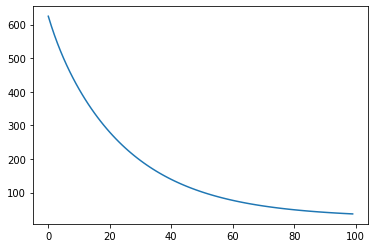

In [15]:
plt.plot(total)

In [23]:
print(w_value.astype(float).dtype)

float64
